#installs

In [1]:
%pip install git+https://github.com/delbempedro/ic

  Cloning https://github.com/delbempedro/ic to /tmp/pip-req-build-dn3tuc0f
  Running command git clone --filter=blob:none --quiet https://github.com/delbempedro/ic /tmp/pip-req-build-dn3tuc0f
  Resolved https://github.com/delbempedro/ic to commit e903abfe390bff7f6f739f0a1b4edf3e739949a7
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


#imports

In [2]:
from ic import *
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from math import pi

#code

In [3]:
service = QiskitRuntimeService()

In [4]:
input1 = 1.0
input2 = 1.0

weight1 = 0.5
weight2 = 0.5

In [14]:
static_angle = 0

qc = current_circuit(3,1)

qc.get_current_circuit().h(0)
qc.get_current_circuit().h(1)

qc.get_current_circuit().cu(input1,static_angle,static_angle,static_angle,[0],[1])
qc.get_current_circuit().x(1)
qc.get_current_circuit().cu(input2,static_angle,static_angle,static_angle,[0],[1])

qc.get_current_circuit().cu(weight1,static_angle,static_angle,static_angle,[0],[1]).inverse()
qc.get_current_circuit().x(1)
qc.get_current_circuit().cu(weight2,static_angle,static_angle,static_angle,[0],[1]).inverse()

qc.get_current_circuit().h(0)
qc.get_current_circuit().h(1)
qc.get_current_circuit().x(0)
qc.get_current_circuit().x(1)
qc.get_current_circuit().ccx(0,1,2)
qc.get_current_circuit().measure(2,0)

In [13]:
qc.run_circuit("3",service)

{'1': 1024}

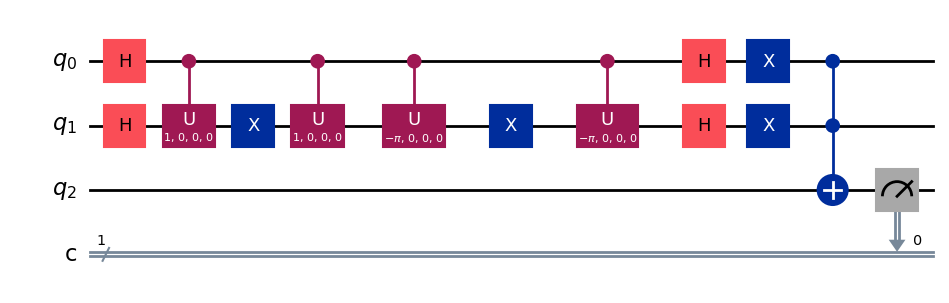

In [9]:
qc.get_current_circuit().draw('mpl')